In [3]:
import pandas as pd
from fbprophet import Prophet

In [4]:
df = pd.read_csv('../data/dni/ts/1.4.csv')
df.head()

,ts,radiation
0,2008-01-31,188808
1,2008-02-29,69838
2,2008-03-31,161548
3,2008-04-30,219322
4,2008-05-31,248859


In [10]:
test_data = df.tail(24)

In [11]:
test_data

,ts,radiation
103,2016-08-31,197698
104,2016-09-30,201359
105,2016-10-31,238367
106,2016-11-30,253594
107,2016-12-31,172648
108,2017-01-31,139018
109,2017-02-28,173022
110,2017-03-31,213918
111,2017-04-30,219929
112,2017-05-31,221450


In [12]:
len(df)

127

In [13]:
train_data = df[:len(df)-24]

In [20]:
train_data.columns = ['ds', 'y']
m = Prophet(seasonality_mode='multiplicative')
m.fit(train_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = m.make_future_dataframe(periods=24, freq='M')
future.tail()

,ds
122,2018-03-31
123,2018-04-30
124,2018-05-31
125,2018-06-30
126,2018-07-31


In [22]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
122,2018-03-31,184999.730507,143730.369097,225463.320503
123,2018-04-30,216716.448537,175103.536503,257069.868865
124,2018-05-31,205736.245420,168006.051580,245184.073343
125,2018-06-30,214811.603528,175996.390369,255061.447810
126,2018-07-31,226320.550371,189256.012790,265247.044006


In [23]:
forecast_data = forecast.tail(24)

In [26]:
forecast_data = forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [27]:
forecast_data

,ds,yhat,yhat_lower,yhat_upper
103,2016-08-31,251596.674967,214302.138973,293751.675889
104,2016-09-30,241594.702982,201771.664865,279640.705133
105,2016-10-31,235280.865760,196668.994853,272510.773372
106,2016-11-30,190053.869557,150286.106624,228632.585004
107,2016-12-31,174269.847510,133759.868275,212944.447171
108,2017-01-31,167322.219114,129995.124949,206150.627645
109,2017-02-28,148737.046115,108942.690392,187969.289821
110,2017-03-31,183478.891069,148685.476546,222941.609741
111,2017-04-30,215470.978408,177896.888462,254956.493730
112,2017-05-31,204700.615475,163741.302196,245558.104982


In [33]:
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
import numpy as np
def plot_series(yhat, yhat_lower, yhat_upper, truth=False, truth_data=None, truth_label='Truth', prediction_length=24):
    x = range(0,prediction_length)
    plt.gcf().clear()
    mean_label,   = plt.plot(x, yhat, label='mean')
    q1_label,     = plt.plot(x, yhat_lower, label='yhat_lower')
    q2_label,     = plt.plot(x, yhat_upper, label='yhat_upper')

    if truth:
        ground_truth, = plt.plot(x, truth_data, label=truth_label)
        plt.legend(handles=[ground_truth, q2_label, mean_label, q1_label])
    else:
        plt.legend(handles=[q2_label, mean_label, q1_label])
    plt.yticks(np.arange(5.0, 12.0, 0.5))
    plt.show()

In [44]:
yhat = list(forecast_data['yhat'])
yhat_lower = list(forecast_data['yhat_lower'])
yhat_upper = list(forecast_data['yhat_upper'])
truth_data = list(test_data['radiation'])

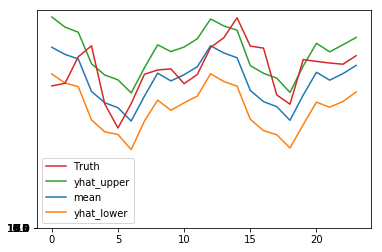

In [46]:
plot_series(yhat, yhat_lower, yhat_upper, truth=True, truth_data=truth_data)